
#Sarcasm Detection on Airline Reviews - Data Preprocessing

This notebook demonstrates the steps for preprocessing a dataset for sarcasm detection in Airline Reviews using deep learning. The preprocessing steps include loading the dataset, cleaning the data, and preparing the data for model training.

#Dataset Overview
We are using a dataset of Airline Reviews which contains the following columns:

`Review`: The text of the YouTube comment.

`sarcasm`: The target label indicating whether the comment is sarcastic (1) or not (0).


Additional features related to airline information.

Let's load the dataset and take a look at its structure.

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
dataset_path = '/content/drive/My Drive/Airline_Reviews_Labeled.csv'
  # Update with your dataset path
data = pd.read_csv(dataset_path)


class_distribution = data['sarcasm'].value_counts()
print(class_distribution)

minority_class_percentage = (class_distribution.min() / len(data)) * 100
print(minority_class_percentage)

majority_class_percentage = (class_distribution.max() / len(data)) * 100
print(majority_class_percentage)

Mounted at /content/drive
sarcasm
1    16548
0     6623
Name: count, dtype: int64
28.58314272150533
71.41685727849467


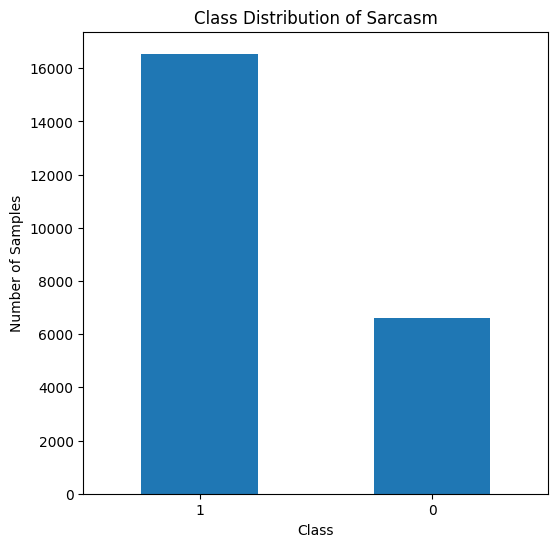

In [2]:
import matplotlib.pyplot as plt
# Plotting the class distribution
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Sarcasm')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()

In [3]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0','Airline Name','Overall_Rating','Review_Title','Review Date',
    'Verified','Aircraft','Type Of Traveller','Route', 'Seat Type', 'Date Flown',
    'Seat Comfort','Cabin Staff Service', 'Food & Beverages',
    'Ground Service', 'Inflight Entertainment',
    'Wifi & Connectivity', 'Value For Money','Recommended',
]

# Drop columns
data = data.drop(columns=columns_to_drop, errors='ignore')


Taking Subset of the Dateset

In [4]:
# Randomly sample 8000 records
sampled_data = data.sample(n=20000, random_state=42)

Spliting into train and test data

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(sampled_data['Review'], sampled_data['sarcasm'], test_size=0.2, random_state=42)


In [6]:
# Convert to DataFrame for preprocessing
train_data = pd.DataFrame({'text': X_train, 'label': y_train})

In [7]:
# Convert to DataFrame for preprocessing
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

# Data Visualization

In [8]:
# Describe the dataset
print(train_data.describe())

              label
count  16000.000000
mean       0.711500
std        0.453079
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


In [9]:
# Shape of the dataset
print(train_data.shape)

(16000, 2)


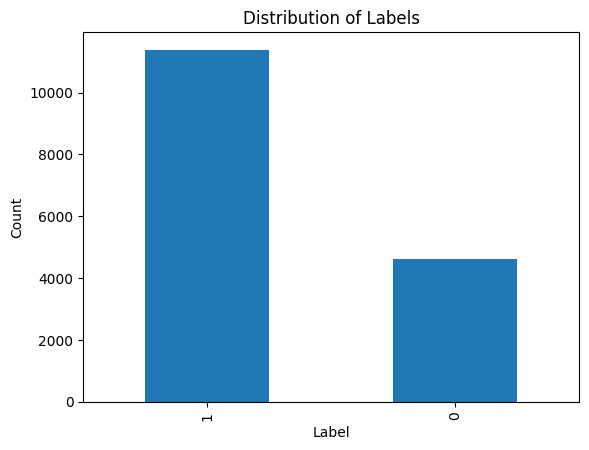

In [10]:
import matplotlib.pyplot as plt
# Distribution of labels
train_data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


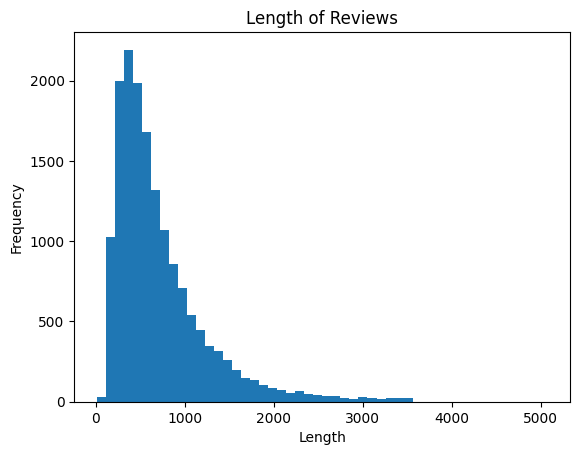

In [11]:
import matplotlib.pyplot as plt

# Length of reviews
train_data['review_length'] = train_data['text'].apply(len)
plt.hist(train_data['review_length'], bins=50)
plt.title('Length of Reviews')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Check for missing values
print(train_data.isnull().sum())


text             0
label            0
review_length    0
dtype: int64


In [13]:

# Check for duplicates
print(train_data.duplicated().sum())

# Remove duplicates
train_data = train_data.drop_duplicates()


53


# Data Cleaning

In [14]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data Preprocessing

In [15]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Apply text cleaning and stopword removal
train_data['clean_text'] = train_data['text'].apply(clean_text)

# Tokenize the text
train_data['tokenized_text'] = train_data['clean_text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

<ipython-input-14-12dab4262dd2>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors


In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
train_data['encoded_label'] = label_encoder.fit_transform(train_data['label'])


##Text Vecotorization

In [17]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import numpy as np

# Prepare data for Word2Vec
sentences = train_data['tokenized_text'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec_vector(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)  # Assuming vector_size is 100
    return np.mean(vectors, axis=0)

# Apply the function to get Word2Vec vectors for the training data
train_data['word2vec'] = train_data['tokenized_text'].apply(get_word2vec_vector)

print(train_data)



                                                    text  label  \
2039   I was flying from Beijing to Pyongyang with a ...      0   
1692     Will definitely fly again with them. Very pr...      1   
8917     My flight was cancelled on September 10 and ...      1   
4132    I am not able to do web check in and their cu...      1   
6442   First flight was an overnight flight from Toro...      0   
...                                                  ...    ...   
10282    Flew economy from Perth to Denpasar return a...      1   
11199   I was really looking forward to this flight a...      0   
11800    Can never say enough good comments about Jap...      0   
2862   Seychelles to Paris. A middle age Boeing 767 c...      0   
3677    Airlink is an up and coming airline in Southe...      0   

       review_length                                         clean_text  \
2039             177  flying beijing pyongyang tupolev 204 300 aircr...   
1692             284  definitely fly professi

## Handling Imbalanced Data

In [18]:
from imblearn.over_sampling import SMOTE

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_data['word2vec'].tolist(), train_data['encoded_label'])


#Training and Testing Deep Learning Models

##1. Simple Neural Network

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               12928     
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 64)               

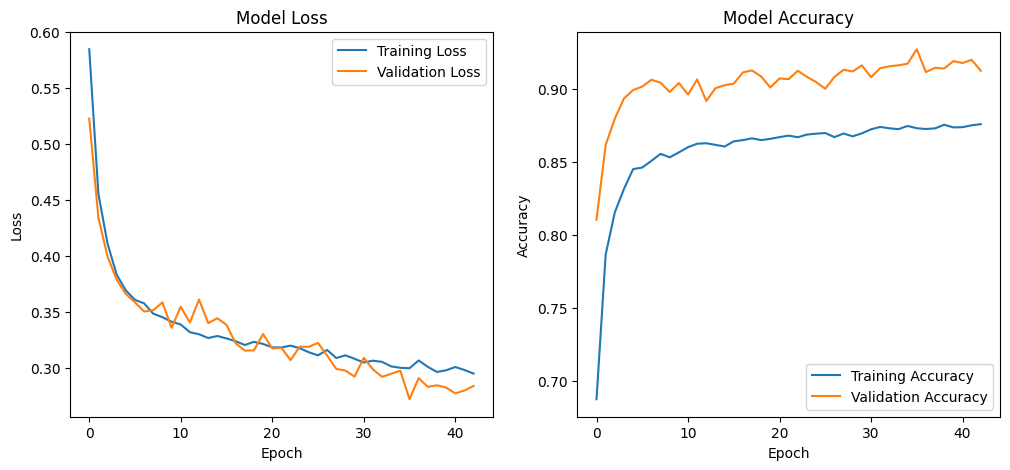

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_resampled and y_resampled are already defined and preprocessed

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# Convert labels to categorical one-hot encoding
num_classes = len(np.unique(y_resampled))

def to_categorical(y, num_classes):
    return np.eye(num_classes)[y]

y_resampled_categorical = to_categorical(y_resampled, num_classes)

# Define the model architecture with Early Stopping and Batch Normalization
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()

# Compile the model with a lower learning rate
adam_optimizer = Adam(learning_rate=0.0001)  # Adjust the learning rate as needed
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback with min_delta and ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=7, min_delta=0.001, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

# Train the model with Early Stopping and Learning Rate Scheduler
history = model.fit(X_resampled, y_resampled_categorical, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_resampled, y_resampled_categorical)
print(f'Model accuracy: {accuracy:.2f}')

# Make predictions
y_pred = model.predict(X_resampled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_resampled_categorical, axis=1)

# Calculate the F1 score
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f'F1 score: {f1:.2f}')

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and recall
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Confusion Matrix:
[[10212  1137]
 [ 1175 10174]]
Precision: 0.90
Recall: 0.90


In [27]:
# Clean the testing data
X_test_clean = X_test.apply(clean_text)

# Tokenize the text
X_test_tokenized = X_test_clean.apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Define the expected vector length
expected_vector_length = 100  # This should match the vector size used during training

# Ensure all vectors are the same length
def get_word2vec_vector(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(expected_vector_length)  # Assuming vector_size is 100
    return np.mean(vectors, axis=0)

X_test_vectors = X_test_tokenized.apply(get_word2vec_vector)

# Convert to numpy array
X_test_vectors = np.array(X_test_vectors.tolist())

# Ensure all vectors have the correct length
X_test_vectors = np.array([vec if len(vec) == expected_vector_length else np.zeros(expected_vector_length) for vec in X_test_vectors])

# Check for NaN values and replace them with zeros if necessary
X_test_vectors = np.nan_to_num(X_test_vectors)

# Check if all vectors have the correct shape
print("Shape of X_test_vectors:", X_test_vectors.shape)


<ipython-input-14-12dab4262dd2>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


Shape of X_test_vectors: (4000, 100)


In [25]:
# Convert labels to categorical one-hot encoding
num_classes = len(np.unique(y_resampled))  # Ensure this matches the training data
y_test_categorical = to_categorical(y_test, num_classes)
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_vectors, y_test_categorical)
print(f'Test Accuracy: {accuracy:.2f}')
# Make predictions on the test set
y_test_pred = model.predict(X_test_vectors)

# Convert predictions and true labels from categorical to labels
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_labels = np.argmax(y_test_categorical, axis=1)

# Generate and print classification report
from sklearn.metrics import classification_report
report = classification_report(y_test_labels, y_test_pred_labels)
print('Classification Report:')
print(report)


125/125 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8758
Test Accuracy: 0.88
125/125 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1100
           1       0.94      0.89      0.91      2900

    accuracy                           0.88      4000
   macro avg       0.84      0.87      0.85      4000
weighted avg       0.88      0.88      0.88      4000



##2. LSTM

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 128)          66560     
                                                                 
 batch_normalization_4 (Bat  (None, 100, 128)          512       
 chNormalization)                                                
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 116866 (456.51 KB)
Trainable params: 116

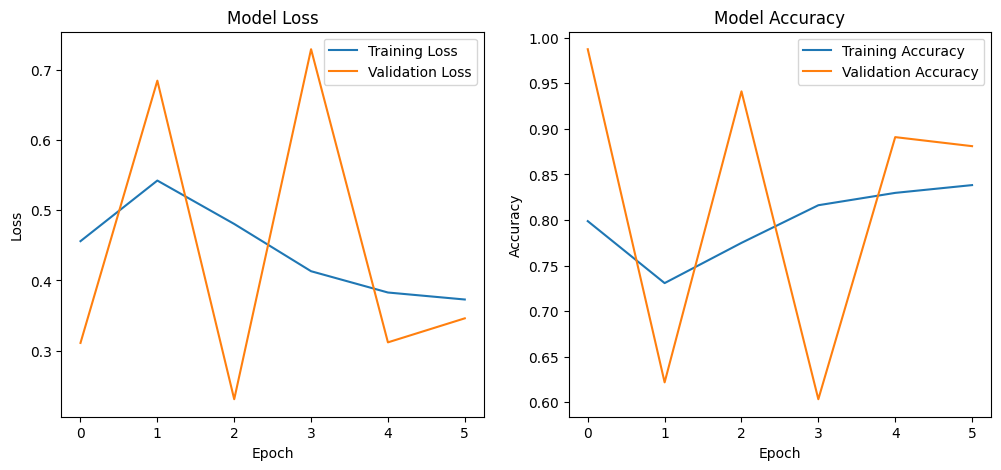

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_resampled and y_resampled are already defined and preprocessed

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# Convert labels to categorical one-hot encoding
num_classes = len(np.unique(y_resampled))

def to_categorical(y, num_classes):
    return np.eye(num_classes)[y]

y_resampled_categorical = to_categorical(y_resampled, num_classes)

# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', input_shape=(X_resampled.shape[1], 1), return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(LSTM(64, activation='relu'))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
lstm_model.summary()

# Compile the model with a lower learning rate
adam_optimizer = Adam(learning_rate=0.0001)  # Adjust the learning rate as needed
lstm_model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback with min_delta and ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.01, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001, verbose=1)

# Train the model with Early Stopping and Learning Rate Scheduler
history = lstm_model.fit(X_resampled, y_resampled_categorical, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop, reduce_lr])

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_resampled, y_resampled_categorical)
print(f'Model accuracy: {accuracy:.2f}')

# Make predictions
y_pred = lstm_model.predict(X_resampled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_resampled_categorical, axis=1)

# Calculate the F1 score
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print(f'F1 score: {f1:.2f}')

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##3. BiLSTM

In [29]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Define the Bidirectional LSTM model architecture
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_resampled.shape[1], 1)))
bilstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
bilstm_model.add(Bidirectional(LSTM(64)))
bilstm_model.add(Dense(128, activation='relu'))
bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with a specified learning rate
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate as needed
bilstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally add Early Stopping with a minimum delta for improvement
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=7, restore_best_weights=True)

# Reshape data for Bidirectional LSTM
X_resampled_bilstm = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Train the model with Early Stopping callback
bilstm_history = bilstm_model.fit(X_resampled_bilstm, y_resampled_categorical,
                                  epochs=30, batch_size=32,
                                  validation_split=0.2,
                                  callbacks=[early_stopping])




Epoch 1/30
568/568 [==============================] - 40s 41ms/step - loss: 0.4507 - accuracy: 0.7811 - val_loss: 0.4601 - val_accuracy: 0.8185
Epoch 2/30
568/568 [==============================] - 19s 34ms/step - loss: 0.4022 - accuracy: 0.8181 - val_loss: 0.4697 - val_accuracy: 0.8211
Epoch 3/30
568/568 [==============================] - 19s 33ms/step - loss: 0.3841 - accuracy: 0.8289 - val_loss: 0.5367 - val_accuracy: 0.7892
Epoch 4/30
568/568 [==============================] - 20s 36ms/step - loss: 0.3791 - accuracy: 0.8297 - val_loss: 0.4246 - val_accuracy: 0.8586
Epoch 5/30
568/568 [==============================] - 20s 35ms/step - loss: 0.3765 - accuracy: 0.8300 - val_loss: 0.4062 - val_accuracy: 0.8637
Epoch 6/30
568/568 [==============================] - 19s 34ms/step - loss: 0.3767 - accuracy: 0.8315 - val_loss: 0.5850 - val_accuracy: 0.7590
Epoch 7/30
568/568 [==============================] - 21s 36ms/step - loss: 0.3735 - accuracy: 0.8337 - val_loss: 0.4521 - val_accuracy:

In [30]:
# Evaluate the model on the training data
train_loss, train_accuracy = bilstm_model.evaluate(X_resampled_bilstm, y_resampled_categorical)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Make predictions on the training data
y_train_pred = bilstm_model.predict(X_resampled_bilstm)

# Convert predictions and true labels to class labels
y_train_pred_labels = np.argmax(y_train_pred, axis=-1)
y_train_true_labels = np.argmax(y_resampled_categorical, axis=-1)

# Calculate and print the F1 score for the training data
train_f1_score = f1_score(y_train_true_labels, y_train_pred_labels, average='weighted')
print(f'Training F1 Score: {train_f1_score:.2f}')

710/710 [==============================] - 10s 14ms/step - loss: 0.3765 - accuracy: 0.8364
Training Accuracy: 0.84
710/710 [==============================] - 11s 13ms/step
Training F1 Score: 0.84


In [31]:
# Reshape test data to match input shape of the model
X_test_vectors = X_test_vectors.reshape(X_test_vectors.shape[0], X_test_vectors.shape[1], 1)

# Evaluate the model on the testing data
num_classes = len(np.unique(y_resampled))  # Ensure this matches the training data
y_test_categorical = to_categorical(y_test, num_classes)

# Print shapes of the test data
print(f'Shape of X_test_vectors: {X_test_vectors.shape}')
print(f'Shape of y_test_categorical: {y_test_categorical.shape}')

# Evaluate the model on the testing data
try:
    loss, accuracy = bilstm_model.evaluate(X_test_vectors, y_test_categorical)
    print(f'Test Accuracy: {accuracy:.2f}')
except Exception as e:
    print(f'Error during model evaluation: {e}')

# Make predictions on the test set
try:
    y_test_pred = bilstm_model.predict(X_test_vectors)
    # Convert predictions and true labels from categorical to labels
    y_test_pred_labels = np.argmax(y_test_pred, axis=1)
    y_test_labels = np.argmax(y_test_categorical, axis=1)

    # Generate and print classification report
    report = classification_report(y_test_labels, y_test_pred_labels)
    print('Classification Report:')
    print(report)
except Exception as e:
    print(f'Error during prediction or report generation: {e}')

Shape of X_test_vectors: (4000, 100, 1)
Shape of y_test_categorical: (4000, 2)
125/125 [==============================] - 2s 13ms/step - loss: 0.4199 - accuracy: 0.7945
Test Accuracy: 0.79
125/125 [==============================] - 1s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.87      0.70      1100
           1       0.94      0.77      0.84      2900

    accuracy                           0.79      4000
   macro avg       0.76      0.82      0.77      4000
weighted avg       0.84      0.79      0.80      4000



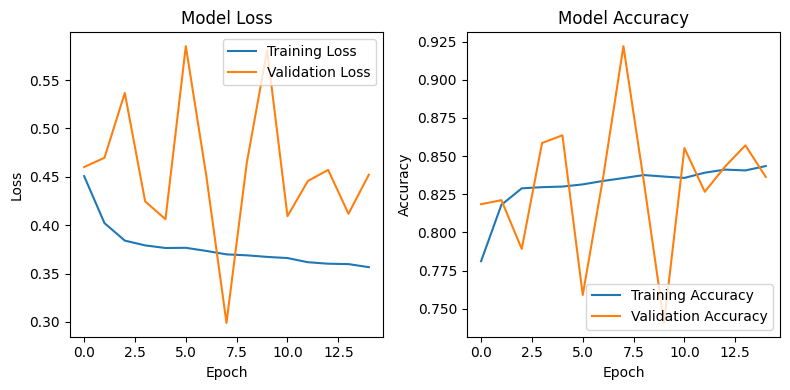

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(bilstm_history.history['loss'], label='Training Loss')
plt.plot(bilstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(bilstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


## 4. CNN

In [52]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LeakyReLU, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Convert lists to numpy arrays
X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

# Reshape data for CNN
X_resampled_cnn = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled_cnn, y_resampled, test_size=0.2, random_state=42)

# Define the CNN model architecture with LeakyReLU
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=5, input_shape=(X_train.shape[1], 1)))
cnn_model.add(LeakyReLU(alpha=0.1))
cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(64))
cnn_model.add(LeakyReLU(alpha=0.1))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Single node with sigmoid for binary classification

# Compile the model with optimizer and learning rate
optimizer = Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping and learning rate scheduler with minimum delta
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=0.0001)

# Train the model with early stopping and learning rate scheduler
cnn_history = cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the training data
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_train, y_train)
print(f'CNN Model accuracy: {cnn_accuracy:.2f}')

# Make predictions on the training data
y_pred_prob = cnn_model.predict(X_train)
y_pred_classes = (y_pred_prob > 0.5).astype(int).flatten()

# Compute F1 score on the training data
f1score = f1_score(y_train, y_pred_classes, average='weighted')
print(f'F1 Score: {f1score:.2f}')




Epoch 1/30
568/568 [==============================] - 8s 13ms/step - loss: 0.3976 - accuracy: 0.8409 - val_loss: 0.3353 - val_accuracy: 0.8621 - lr: 1.0000e-04
Epoch 2/30
568/568 [==============================] - 5s 10ms/step - loss: 0.3352 - accuracy: 0.8644 - val_loss: 0.3189 - val_accuracy: 0.8727 - lr: 1.0000e-04
Epoch 3/30
568/568 [==============================] - 7s 13ms/step - loss: 0.3234 - accuracy: 0.8726 - val_loss: 0.3151 - val_accuracy: 0.8756 - lr: 1.0000e-04
Epoch 4/30
568/568 [==============================] - 6s 10ms/step - loss: 0.3171 - accuracy: 0.8732 - val_loss: 0.3041 - val_accuracy: 0.8775 - lr: 1.0000e-04
Epoch 5/30
568/568 [==============================] - 6s 11ms/step - loss: 0.3118 - accuracy: 0.8754 - val_loss: 0.3008 - val_accuracy: 0.8795 - lr: 1.0000e-04
Epoch 6/30
568/568 [==============================] - 7s 12ms/step - loss: 0.3078 - accuracy: 0.8780 - val_loss: 0.3014 - val_accuracy: 0.8804 - lr: 1.0000e-04
Epoch 7/30
568/568 [====================

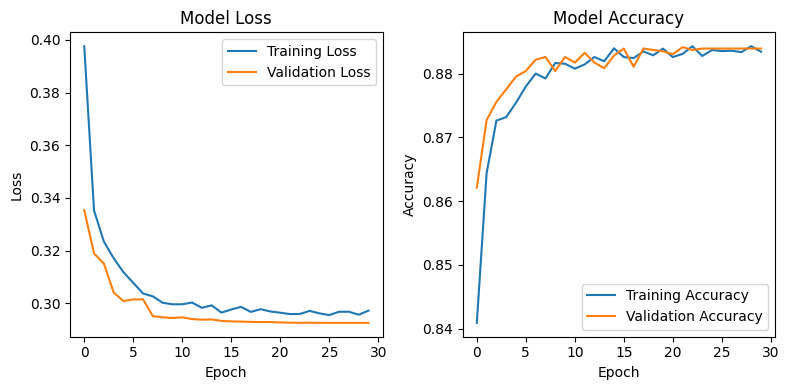

In [53]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [42]:

from sklearn.metrics import classification_report

# Ensure the test data is reshaped correctly
X_test_vectors = np.reshape(X_test_vectors, (X_test_vectors.shape[0], X_test_vectors.shape[1], 1))

# Convert y_test to binary format if it is not already
if y_test_categorical.shape[1] > 1:
    y_test = y_test_categorical.argmax(axis=-1)
else:
    y_test = y_test_categorical

# Evaluate the CNN model on the testing data
loss, accuracy = cnn_model.evaluate(X_test_vectors, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Make predictions on the test data
y_pred = cnn_model.predict(X_test_vectors)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Generate and print the classification report
report = classification_report(y_test, y_pred_classes)
print(report)


125/125 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8652
Test Accuracy: 0.87
125/125 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      1100
           1       0.95      0.86      0.90      2900

    accuracy                           0.87      4000
   macro avg       0.83      0.87      0.84      4000
weighted avg       0.88      0.87      0.87      4000



##5. RNN

In [59]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Define the RNN model architecture
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, input_shape=(X_resampled.shape[1], 1), return_sequences=True))
rnn_model.add(Dropout(0.5))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for RNN
X_resampled_rnn = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model with early stopping
rnn_history = rnn_model.fit(X_resampled_rnn, y_resampled_categorical,
                            epochs=50, batch_size=32, validation_split=0.2,
                            callbacks=[early_stopping])

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_resampled_rnn, y_resampled_categorical)
print(f'RNN Model accuracy: {rnn_accuracy:.2f}')

# Make predictions
y_pred_rnn = rnn_model.predict(X_resampled_rnn)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Compute F1 score
f1score_rnn = f1_score(np.argmax(y_resampled_categorical, axis=1), y_pred_classes_rnn, average='weighted')

print(f'RNN Model F1 Score: {f1score_rnn:.2f}')


Epoch 1/50
568/568 [==============================] - 46s 75ms/step - loss: 0.4612 - accuracy: 0.7884 - val_loss: 0.5385 - val_accuracy: 0.8687
Epoch 2/50
568/568 [==============================] - 43s 75ms/step - loss: 0.3987 - accuracy: 0.8280 - val_loss: 0.4040 - val_accuracy: 0.8570
Epoch 3/50
568/568 [==============================] - 43s 77ms/step - loss: 0.3824 - accuracy: 0.8382 - val_loss: 0.5319 - val_accuracy: 0.8388
Epoch 4/50
568/568 [==============================] - 43s 76ms/step - loss: 0.3780 - accuracy: 0.8391 - val_loss: 0.5502 - val_accuracy: 0.8134
Epoch 5/50
710/710 [==============================] - 14s 20ms/step - loss: 0.3765 - accuracy: 0.8384
RNN Model accuracy: 0.84
710/710 [==============================] - 15s 20ms/step
RNN Model F1 Score: 0.84


In [60]:
from sklearn.metrics import classification_report
import numpy as np

# Reshape the test data if necessary
X_test_vectors = np.reshape(X_test_vectors, (X_test_vectors.shape[0], X_test_vectors.shape[1], 1))

# Evaluate the RNN model on the testing data
loss, accuracy = rnn_model.evaluate(X_test_vectors, y_test_categorical)
print(f'Test Accuracy: {accuracy:.2f}')

# Make predictions on the test data
y_pred = rnn_model.predict(X_test_vectors)

# Convert predictions to class labels
y_pred_classes = y_pred.argmax(axis=-1)

# Convert true labels to class labels
y_true_classes = y_test_categorical.argmax(axis=-1)

# Generate and print the classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)


125/125 [==============================] - 2s 18ms/step - loss: 0.3686 - accuracy: 0.8238
Test Accuracy: 0.82
125/125 [==============================] - 2s 17ms/step
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1100
           1       0.92      0.82      0.87      2900

    accuracy                           0.82      4000
   macro avg       0.78      0.82      0.80      4000
weighted avg       0.85      0.82      0.83      4000



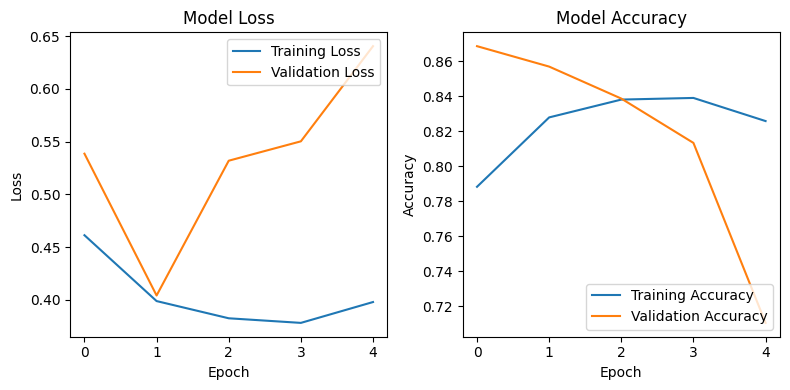

In [61]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


#Conclusion

* Simple Nerual Network - 0.88
* LSTM -
* BiLSTM - 0.79
* CNN - 0.87
* RNN - 0.82

In [52]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.metrics import f1_score, classification_report
from keras.regularizers import l2

# Define the CNN-LSTM model architecture with L2 regularization, batch normalization, and increased dropout
cnn_lstm_model = Sequential()

# CNN layers
cnn_lstm_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_resampled.shape[1], 1), kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Dropout(0.3))

cnn_lstm_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Dropout(0.3))

# LSTM layer
cnn_lstm_model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(0.3))

cnn_lstm_model.add(LSTM(64, kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(0.3))

# Dense layers
cnn_lstm_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(0.3))

cnn_lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with custom learning rate
learning_rate = 0.001  # Adjust the learning rate as needed
optimizer = Adam(learning_rate=learning_rate)
cnn_lstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for CNN-LSTM
X_resampled_cnn_lstm = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Define callbacks with modified early stopping patience
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with callbacks
cnn_lstm_history = cnn_lstm_model.fit(X_resampled_cnn_lstm, y_resampled_categorical,
                                      epochs=30, batch_size=64, validation_split=0.2,
                                      callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the training data
cnn_lstm_loss, cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_resampled_cnn_lstm, y_resampled_categorical)
print(f'CNN-LSTM Model Training Accuracy: {cnn_lstm_accuracy:.2f}')

# Make predictions on the training data
y_pred_cnn_lstm = cnn_lstm_model.predict(X_resampled_cnn_lstm)
y_pred_classes_cnn_lstm = np.argmax(y_pred_cnn_lstm, axis=1)

# Compute F1 score for training data
f1score_cnn_lstm = f1_score(np.argmax(y_resampled_categorical, axis=1), y_pred_classes_cnn_lstm, average='weighted')
print(f'CNN-LSTM Model Training F1 Score: {f1score_cnn_lstm:.2f}')

Epoch 1/30
284/284 [==============================] - 20s 18ms/step - loss: 4.0094 - accuracy: 0.7932 - val_loss: 2.9970 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/30
284/284 [==============================] - 4s 14ms/step - loss: 1.3671 - accuracy: 0.8368 - val_loss: 1.0919 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 3/30
284/284 [==============================] - 5s 19ms/step - loss: 0.6707 - accuracy: 0.8483 - val_loss: 0.6106 - val_accuracy: 0.8467 - lr: 0.0010
Epoch 4/30
284/284 [==============================] - 4s 14ms/step - loss: 0.4709 - accuracy: 0.8531 - val_loss: 0.7010 - val_accuracy: 0.7145 - lr: 0.0010
Epoch 5/30
284/284 [==============================] - 4s 14ms/step - loss: 0.4215 - accuracy: 0.8514 - val_loss: 0.7971 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 6/30
284/284 [==============================] - 5s 17ms/step - loss: 0.4044 - accuracy: 0.8549 - val_loss: 0.4391 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 7/30
284/284 [==============================] - 4s 14

In [56]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.metrics import f1_score, classification_report
from keras.regularizers import l2

# Define the CNN-LSTM model architecture with L2 regularization, batch normalization, and increased dropout
cnn_lstm_model = Sequential()

# CNN layers
cnn_lstm_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_resampled.shape[1], 1), kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Dropout(0.3))

cnn_lstm_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(Dropout(0.3))

# LSTM layer
cnn_lstm_model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(0.3))

cnn_lstm_model.add(LSTM(64, kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(0.3))

# Dense layers
cnn_lstm_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(0.3))

cnn_lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with custom learning rate
learning_rate = 0.0001  # Adjust the learning rate as needed
optimizer = Adam(learning_rate=learning_rate)
cnn_lstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for CNN-LSTM
X_resampled_cnn_lstm = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)

# Define callbacks with modified early stopping patience
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model with callbacks
cnn_lstm_history = cnn_lstm_model.fit(X_resampled_cnn_lstm, y_resampled_categorical,
                                      epochs=30, batch_size=64, validation_split=0.2,
                                      callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the training data
cnn_lstm_loss, cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_resampled_cnn_lstm, y_resampled_categorical)
print(f'CNN-LSTM Model Training Accuracy: {cnn_lstm_accuracy:.2f}')

# Make predictions on the training data
y_pred_cnn_lstm = cnn_lstm_model.predict(X_resampled_cnn_lstm)
y_pred_classes_cnn_lstm = np.argmax(y_pred_cnn_lstm, axis=1)

# Compute F1 score for training data
f1score_cnn_lstm = f1_score(np.argmax(y_resampled_categorical, axis=1), y_pred_classes_cnn_lstm, average='weighted')
print(f'CNN-LSTM Model Training F1 Score: {f1score_cnn_lstm:.2f}')

Epoch 1/30
284/284 [==============================] - 15s 17ms/step - loss: 6.3956 - accuracy: 0.6871 - val_loss: 6.3444 - val_accuracy: 0.0229 - lr: 1.0000e-04
Epoch 2/30
284/284 [==============================] - 5s 18ms/step - loss: 5.6919 - accuracy: 0.7671 - val_loss: 5.6406 - val_accuracy: 0.5385 - lr: 1.0000e-04
Epoch 3/30
284/284 [==============================] - 4s 13ms/step - loss: 5.1067 - accuracy: 0.7854 - val_loss: 4.8094 - val_accuracy: 0.7758 - lr: 1.0000e-04
Epoch 4/30
284/284 [==============================] - 4s 14ms/step - loss: 4.5792 - accuracy: 0.8000 - val_loss: 4.3444 - val_accuracy: 0.7725 - lr: 1.0000e-04
Epoch 5/30
284/284 [==============================] - 5s 16ms/step - loss: 4.0817 - accuracy: 0.8068 - val_loss: 3.9023 - val_accuracy: 0.7868 - lr: 1.0000e-04
Epoch 6/30
284/284 [==============================] - 4s 15ms/step - loss: 3.6429 - accuracy: 0.8173 - val_loss: 3.4808 - val_accuracy: 0.7797 - lr: 1.0000e-04
Epoch 7/30
284/284 [===================

In [58]:
# Reshape test data to match input shape of the model
X_test_vectors = X_test_vectors.reshape(X_test_vectors.shape[0], X_test_vectors.shape[1], 1)

# Convert test labels to categorical
y_test_categorical = to_categorical(y_test, num_classes)

# Print shapes of the test data
print(f'Shape of X_test_vectors: {X_test_vectors.shape}')
print(f'Shape of y_test_categorical: {y_test_categorical.shape}')

# Evaluate the model on the testing data
try:
    loss, accuracy = cnn_lstm_model.evaluate(X_test_vectors, y_test_categorical)
    print(f'Test Accuracy: {accuracy:.2f}')
except Exception as e:
    print(f'Error during model evaluation: {e}')

# Make predictions on the test set
try:
    y_test_pred = cnn_lstm_model.predict(X_test_vectors)
    # Convert predictions and true labels from categorical to labels
    y_test_pred_labels = np.argmax(y_test_pred, axis=1)
    y_test_labels = np.argmax(y_test_categorical, axis=1)

    # Generate and print classification report
    report = classification_report(y_test_labels, y_test_pred_labels)
    print('Classification Report:')
    print(report)
except Exception as e:
    print(f'Error during prediction or report generation: {e}')

Shape of X_test_vectors: (4000, 100, 1)
Shape of y_test_categorical: (4000, 2)
125/125 [==============================] - 1s 5ms/step - loss: 0.3930 - accuracy: 0.8827
Test Accuracy: 0.88
125/125 [==============================] - 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1100
           1       0.92      0.92      0.92      2900

    accuracy                           0.88      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.88      0.88      0.88      4000



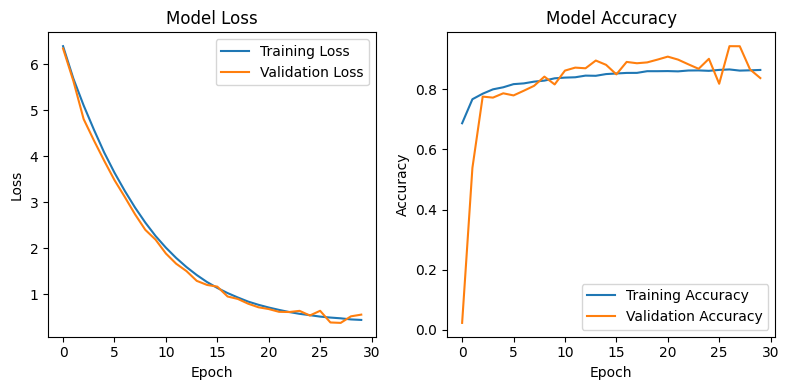

In [57]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(cnn_lstm_history.history['loss'], label='Training Loss')
plt.plot(cnn_lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [59]:
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, classification_report
from keras.utils import to_categorical

# Load BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming you have tokenized data in train_data['tokenized_text'] and labels in train_data['label']
max_len = 128  # Define the maximum length for padding/truncating
X_tokenized = train_data['tokenized_text'].tolist()
y = train_data['label'].tolist()

# Pad/truncate the tokenized sequences to the max length
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_tokenized, maxlen=max_len, padding='post', truncating='post')

# Convert labels to categorical format
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes)

# Define a function to get BERT embeddings
def get_bert_embeddings(input_ids):
    attention_mask = tf.where(input_ids != 0, 1, 0)
    outputs = bert_model(input_ids, attention_mask=attention_mask)
    return outputs.last_hidden_state

# Define the model architecture
input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
bert_embeddings = tf.keras.layers.Lambda(lambda x: get_bert_embeddings(x))(input_ids)

lstm_layer = LSTM(128, return_sequences=False)(bert_embeddings)
dropout_layer = Dropout(0.3)(lstm_layer)
output_layer = Dense(num_classes, activation='softmax')(dropout_layer)

model = Model(inputs=input_ids, outputs=output_layer)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(X_padded, y_categorical,
                    epochs=20, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_padded, y_categorical)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Make predictions on the training data
y_train_pred = model.predict(X_padded)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# Compute F1 score for training data
f1score_train = f1_score(np.argmax(y_categorical, axis=1), y_train_pred_classes, average='weighted')
print(f'Training F1 Score: {f1score_train:.2f}')




model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
399/399 [==============================] - 249s 561ms/step - loss: 0.3282 - accuracy: 0.8565 - val_loss: 0.3134 - val_accuracy: 0.8821 - lr: 0.0010
Epoch 2/20
399/399 [==============================] - 213s 534ms/step - loss: 0.2937 - accuracy: 0.8713 - val_loss: 0.2788 - val_accuracy: 0.8821 - lr: 0.0010
Epoch 3/20
399/399 [==============================] - 213s 534ms/step - loss: 0.2541 - accuracy: 0.8921 - val_loss: 0.2723 - val_accuracy: 0.8928 - lr: 0.0010
Epoch 4/20
399/399 [==============================] - 214s 535ms/step - loss: 0.2356 - accuracy: 0.9030 - val_loss: 0.2548 - val_accuracy: 0.8987 - lr: 0.0010
Epoch 5/20
399/399 [==============================] - 213s 532ms/step - loss: 0.2216 - accuracy: 0.9075 - val_loss: 0.2434 - val_accuracy: 0.9013 - lr: 0.0010
Epoch 6/20
399/399 [==============================] - 213s 533ms/step - loss: 0.2105 - accuracy: 0.9114 - val_loss: 0.2503 - val_accuracy: 0.8991 - lr: 0.0010
Epoch 7/20
399/399 [==========================

In [60]:
# Clean the testing data
test_data['clean_text'] = test_data['text'].apply(clean_text)

# Tokenize the text
test_data['tokenized_text'] = test_data['clean_text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Pad/truncate the tokenized sequences to the max length
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_data['tokenized_text'].tolist(), maxlen=max_len, padding='post', truncating='post')

# Convert labels to categorical format
y_test_categorical = to_categorical(test_data['label'], num_classes)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_categorical)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Make predictions on the test set
y_test_pred = model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Generate and print classification report
report = classification_report(np.argmax(y_test_categorical, axis=1), y_test_pred_classes)
print('Classification Report:')
print(report)


<ipython-input-14-12dab4262dd2>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


125/125 [==============================] - 37s 297ms/step - loss: 0.2344 - accuracy: 0.9020
Test Accuracy: 0.90
125/125 [==============================] - 37s 295ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1100
           1       0.94      0.93      0.93      2900

    accuracy                           0.90      4000
   macro avg       0.87      0.88      0.88      4000
weighted avg       0.90      0.90      0.90      4000



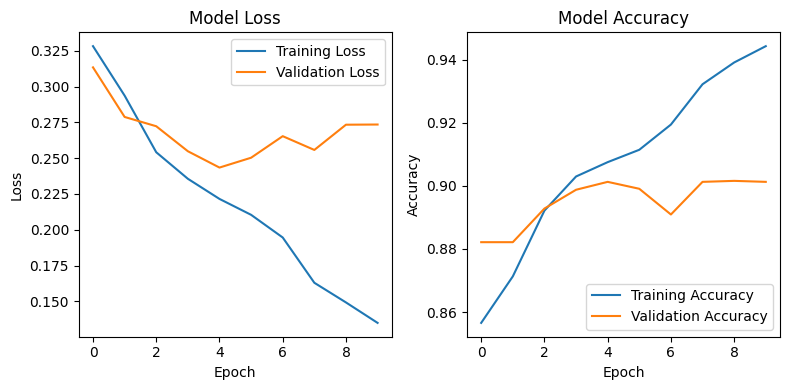

In [61]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(8, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
